# Data Cleaning

In [45]:
# importing pandas for data analysis requisite libraries
import pandas as pd

In [46]:
# reading in the scraped data from SCRAPSFROMTHELOFT
comedy = pd.read_csv('filepath of the raw data', sep='\t') # data is tab separated to avoid issues with commas in the text

In [47]:
# checking 10 random rows
comedy.sample(10, replace=False)

,link,unique_id,date,title,text
253,https://scrapsfromtheloft.com/comedy/eddie-izz...,eddie-izzard-stripped-2009-full-transcript,"\t\t\t\t\t\t\t\t\t\tFebruary 8, 2018\t\t\t\t\t",EDDIE IZZARD: STRIPPED (2009) – Full Transcript,(AUDIENCE CHEERING) London! London! London. Lo...
330,https://scrapsfromtheloft.com/comedy/john-mula...,john-mulaney-new-in-town-2012-full-transcript,"\t\t\t\t\t\t\t\t\t\tSeptember 25, 2017\t\t\t\t\t",John Mulaney: New In Town (2012) – Transcript,[funky 90’s beat and cityscape pan] [singing] ...
214,https://scrapsfromtheloft.com/comedy/jim-gaffi...,jim-gaffigan-noble-ape-full-transcript,"\t\t\t\t\t\t\t\t\t\tJuly 26, 2018\t\t\t\t\t",JIM GAFFIGAN: NOBLE APE (2018) – Full Transcript,BOY: That’s Mom and Dad. [hip-hop music] MAN: ...
212,https://scrapsfromtheloft.com/comedy/iliza-shl...,iliza-shlesinger-confirmed-kills-transcript,"\t\t\t\t\t\t\t\t\t\tJuly 31, 2018\t\t\t\t\t",Iliza Shlesinger: Confirmed Kills (2016) – Ful...,"Chicago, are you ready? Party goblins, are you..."
395,https://scrapsfromtheloft.com/comedy/richard-p...,richard-pryor-live-sunset-strip-1982-full-tran...,"\t\t\t\t\t\t\t\t\t\tApril 26, 2017\t\t\t\t\t",RICHARD PRYOR: LIVE ON THE SUNSET STRIP (1982)...,Recorded at the Circle Star Theater in San Car...
90,https://scrapsfromtheloft.com/comedy/patton-os...,patton-oswalt-i-love-everything-transcript,"\t\t\t\t\t\t\t\t\t\tMay 20, 2020\t\t\t\t\t",PATTON OSWALT: I LOVE EVERYTHING (2020) – FULL...,This is the full transcript of Patton Oswalt: ...
134,https://scrapsfromtheloft.com/comedy/mark-norm...,mark-normand-stand-up-tonight-show-starring-ji...,"\t\t\t\t\t\t\t\t\t\tSeptember 21, 2019\t\t\t\t\t",Mark Normand Stand-Up – The Tonight Show Starr...,"Hey, hey. All right. Thanks. Sorry. A little s..."
192,https://scrapsfromtheloft.com/comedy/comedy-ce...,comedy-central-presents-tom-segura-s15e01-tran...,"\t\t\t\t\t\t\t\t\t\tOctober 13, 2018\t\t\t\t\t",Comedy Central Presents: Tom Segura [S15e01] –...,Yes. I agree. I totally agree. Totally. It’s g...
288,https://scrapsfromtheloft.com/comedy/russell-h...,russell-howard-recalibrate-2017-full-transcript,"\t\t\t\t\t\t\t\t\t\tJanuary 2, 2018\t\t\t\t\t",RUSSELL HOWARD: RECALIBRATE (2017) – Full Tran...,"Ladies and gentlemen, please welcome to the st..."
147,https://scrapsfromtheloft.com/comedy/ralphie-m...,ralphie-may-filthy-animal-tour-transcript,"\t\t\t\t\t\t\t\t\t\tJuly 7, 2019\t\t\t\t\t",Ralphie May: Filthy Animal Tour (2014) – Trans...,Ralphie May hosts his legendary Filthy Animals...


In [48]:
# checking sum stats for the lengths of the text columns--a small minimum would indicate at least one instance of a failed scrape
comedy['text'].str.len().describe() # looks good--smallest length is 2584

count      416.000000
mean     43809.841346
std      17850.147821
min       2584.000000
25%      37267.750000
50%      46336.000000
75%      55466.250000
max      92222.000000
Name: text, dtype: float64

In [49]:
# removing text between brackets as this was added on the site to document crowd reactions
# ex: [Audience Applause] or [Audience Laughs Loudly]
comedy['text'] = comedy['text'].str.replace(r'\[.*?\]', '')

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_21018/1166485829.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comedy['text'] = comedy['text'].str.replace(r'\[.*?\]', '')


In [50]:
# checking the sum stats for the lengths of the text columns after removing the bracketed text
comedy['text'].str.len().describe() # clearly that bracketed text was common--the mean text length decreased significantly

count      416.000000
mean     42849.264423
std      17599.456433
min       2572.000000
25%      35948.750000
50%      45251.500000
75%      53690.500000
max      91585.000000
Name: text, dtype: float64

In [51]:
# creating a new column, year, by extracting the year from the title column
comedy['year'] = comedy['title'].str.extract(r'(\d{4})') # regular expression pattern matching 4 consecutive instances of digits [0-9]
comedy['year'].sample(20, replace=False) # looks good

87     2016
47     2013
3      2020
290    2016
301    2014
172    2016
12     2022
96     2011
53      NaN
326    2007
180    2012
271    1993
391    2011
363    2016
338    1983
226    2009
227    2018
404    2008
384    2000
364    2012
Name: year, dtype: object

In [52]:
# checking how many rows have a missing `year` from the total
pct_missing_year = round(comedy['year'].isnull().sum()/len(comedy), 4) * 100
print(f"{pct_missing_year}% of rows do not have an entry in the year column")

5.29% of rows do not have an entry in the year column


In [53]:
# checking the rows with missing year values
comedy[comedy["year"].isna()]

,link,unique_id,date,title,text,year
44,https://scrapsfromtheloft.com/comedy/dave-chap...,dave-chappelle-846-transcript,"\t\t\t\t\t\t\t\t\t\tAugust 5, 2021\t\t\t\t\t",Dave Chappelle: 8:46 – Transcript,8:46 is a performance special by comedian Dave...,NaN
53,https://scrapsfromtheloft.com/comedy/george-ca...,george-carlin-politically-correct-language,"\t\t\t\t\t\t\t\t\t\tFebruary 18, 2021\t\t\t\t\t",George Carlin: Politically Correct Language,"I know I’m a little late with this, but I’d li...",NaN
55,https://scrapsfromtheloft.com/comedy/chris-roc...,chris-rock-total-blackout-the-tamborine-extend...,"\t\t\t\t\t\t\t\t\t\tJanuary 15, 2021\t\t\t\t\t",Chris Rock Total Blackout: The Tamborine Exten...,"Were you at the, uh, White House party? Yes,...",NaN
77,https://scrapsfromtheloft.com/comedy/bill-hick...,bill-hicks-censored-david-letterman-transcript,"\t\t\t\t\t\t\t\t\t\tJuly 5, 2020\t\t\t\t\t",BILL HICKS: THE CENSORED SEVEN MINUTES ON LATE...,"On October 1, 1993, Hicks was scheduled to app...",NaN
83,https://scrapsfromtheloft.com/comedy/doug-stan...,doug-stanhope-fear-of-an-empty-bed-transcript,"\t\t\t\t\t\t\t\t\t\tJune 9, 2020\t\t\t\t\t",DOUG STANHOPE: FEAR OF AN EMPTY BED [TRANSCRIPT],"Comedy Central, Oct 4, 2016 After a bad breaku...",NaN
103,https://scrapsfromtheloft.com/comedy/dave-alle...,dave-allen-first-day-at-school-transcript,"\t\t\t\t\t\t\t\t\t\tApril 30, 2020\t\t\t\t\t",DAVE ALLEN: FIRST DAY AT CATHOLIC SCHOOL [TRAN...,Dave Allen on his first day at Catholic school...,NaN
106,https://scrapsfromtheloft.com/comedy/george-ca...,george-carlin-indian-drill-sergeant-transcript,"\t\t\t\t\t\t\t\t\t\tApril 13, 2020\t\t\t\t\t",George Carlin: The Indian Drill Sergeant – Tra...,"In 1965 “The Indian Sergeant,” was emerging as...",NaN
109,https://scrapsfromtheloft.com/comedy/bert-krei...,bert-kreischer-fighting-a-bear-transcript,"\t\t\t\t\t\t\t\t\t\tMarch 21, 2020\t\t\t\t\t",Bert Kreischer: Fighting A Bear [Transcript],"The machine, Mr. Bert Kreischer, everybody. Le...",NaN
137,https://scrapsfromtheloft.com/comedy/dave-chap...,dave-chappelle-sticks-stones-epilogue-punchlin...,"\t\t\t\t\t\t\t\t\t\tAugust 29, 2019\t\t\t\t\t",Dave Chappelle: Sticks & Stones | Epilogue: Th...,Tacked onto the end of the Dave Chappelle’s St...,NaN
138,https://scrapsfromtheloft.com/comedy/brazil-co...,brazil-corruption-amazon-hasan-minhaj,"\t\t\t\t\t\t\t\t\t\tAugust 26, 2019\t\t\t\t\t","Brazil, Corruption and the Amazon Rainforest |...","On this episode of Patriot Act, Hasan breaks d...",NaN


In [54]:
# copying the comedy dataframe to a new dataframe
comedy_original = comedy.copy()

In [55]:
# dropping rows with missing year
comedy = comedy_original.dropna(subset=['year'])

In [56]:
# converting the year column to numeric
comedy['year'] = pd.to_numeric(comedy['year'])

/var/folders/hr/r030s1ps2h10bm8_k582nzfc0000gn/T/ipykernel_21018/565625029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy['year'] = pd.to_numeric(comedy['year'])


In [57]:
# checking the 5 num sum of the year column
comedy['year'].describe()

count     394.000000
mean     2012.898477
std         9.924132
min      1963.000000
25%      2011.000000
50%      2016.000000
75%      2019.000000
max      2023.000000
Name: year, dtype: float64

<Axes: >

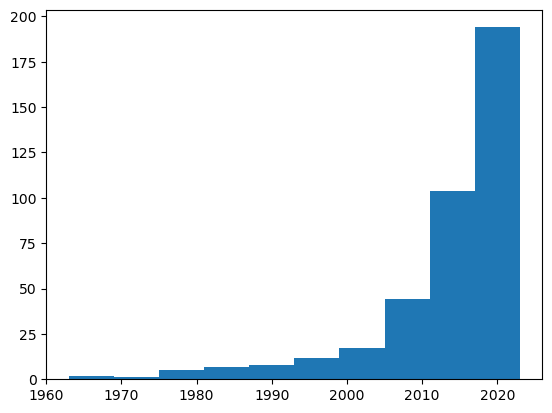

In [58]:
# checking the distribution of the year column
comedy['year'].hist(grid=False) # the data is heavily skewed to the right, most of the transcripts are from the 2010s and on

In [59]:
comedy.columns

Index(['link', 'unique_id', 'date', 'title', 'text', 'year'], dtype='object')

In [60]:
# subsetting the dataframe to only include the necessary columns: year, title, text
comedy = comedy[['year', 'title', 'text']]

In [61]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    394 non-null    int64 
 1   title   394 non-null    object
 2   text    394 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


In [62]:
# writing the cleaned dataframe to a csv file using the tab delimiter
comedy.to_csv('directory to save the cleaned data in', sep='\t', index=False)